In [1]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
import os

In [22]:
def plott(dfs, columns, sufixes, x='Number of env steps total'):
    if len(columns) > 2:
        fig, axs = plt.subplots(2,2)
        figsize = (15, 10)
    else:
        fig, axs = plt.subplots(1,2)
        figsize = (15, 5)

    for j, df in enumerate(dfs):
        if df is not None:
            for i, column in enumerate(columns):
                px = int(i%2)
                py = int(i/2)
                df.plot.line(x=x, y=column, ax=axs[py, px], figsize=(15, 10), title=column)
                axs[py, px].legend([column + ' ' + sufix for sufix in sufixes if sufixes])

In [3]:
progresses = []
for dirname, _, filenames in os.walk('output'):
    for filename in filenames:
        if 'progress' in filename:
            progresses.append(os.path.join(dirname, filename))
            print(os.path.join(dirname, filename))

output/walker-rand-params/2020_02_07_23_05_18/progress.csv
output/sparse-point-robot/2020_02_07_01_13_52/progress.csv
output/sparse-point-robot/2020_02_06_00_14_15/progress.csv
output/humanoid-dir/2020_02_04_21_55_51/progress.csv
output/humanoid-dir/2020_02_04_12_53_44/progress.csv
output/humanoid-dir/2020_02_05_20_18_45/progress.csv
output/humanoid-dir/2020_02_05_00_34_04/progress.csv
output/humanoid-dir/2020_02_05_00_35_33/progress.csv
output/humanoid-dir/2020_02_05_12_42_44/progress.csv
output/humanoid-dir/2020_02_05_12_42_18/progress.csv
output/humanoid-dir/2020_02_05_12_40_42/progress.csv
output/dgx-humanoid-dir/2020_02_04_12_53_44/progress.csv


In [20]:
labels = ['Intrinsic', 'PEARL']
results1 = pd.read_csv(progresses[0], skiprows=[1])
results2 = None # pd.read_csv(progresses[0], skiprows=[1])

print('Results 1 steps:', results1['Number of env steps total'])
if results2:
    print('Results 2 steps:', results2['Number of env steps total'])

Results 1 steps: 0        90492
1        96163
2       101673
3       107098
4       112228
        ...   
187    1107489
188    1112946
189    1118243
190    1123593
191    1128865
Name: Number of env steps total, Length: 192, dtype: int64


In [15]:
results1.columns

Index(['Z mean train', 'Z variance train', 'KL Divergence', 'KL Loss',
       'QF Loss', 'VF Loss', 'Policy Loss', 'Q Predictions Mean',
       'Q Predictions Std', 'Q Predictions Max', 'Q Predictions Min',
       'V Predictions Mean', 'V Predictions Std', 'V Predictions Max',
       'V Predictions Min', 'Log Pis Mean', 'Log Pis Std', 'Log Pis Max',
       'Log Pis Min', 'Policy mu Mean', 'Policy mu Std', 'Policy mu Max',
       'Policy mu Min', 'Policy log std Mean', 'Policy log std Std',
       'Policy log std Max', 'Policy log std Min', 'Decoder Loss',
       'Mean Intrinsic Reward', 'Z mean eval', 'Z variance eval',
       'AverageTrainReturn_all_train_tasks', 'AverageReturn_all_train_tasks',
       'AverageReturn_all_test_tasks', 'Number of train steps total',
       'Number of env steps total', 'Number of rollouts total',
       'Train Time (s)', '(Previous) Eval Time (s)', 'Sample Time (s)',
       'Epoch Time (s)', 'Total Train Time (s)', 'Epoch'],
      dtype='object')

In [16]:
print('Total steps', results1['Number of train steps total'][len(results1['Number of train steps total']) - 1])
print('Train time', results1['Total Train Time (s)'][len(results1['Total Train Time (s)']) - 1])

Total steps 772000
Train time 39724.88307299305


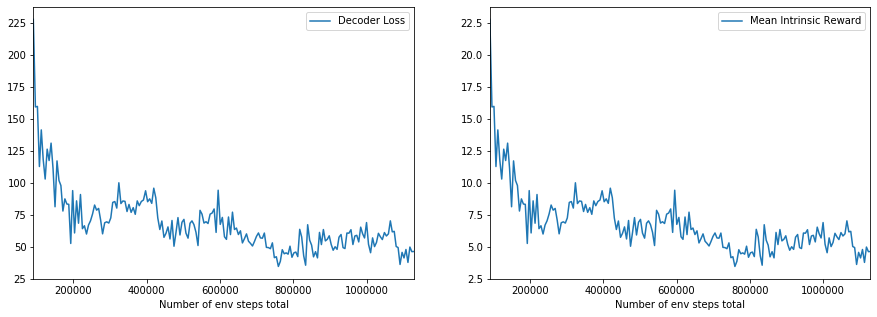

In [18]:
if ('Decoder Loss' in results1.columns and 'Mean Intrinsic Reward' in results1.columns) or \
    (results2 and 'Decoder Loss' in results2.columns and 'Mean Intrinsic Reward' in results2.columns):
    fig, axs = plt.subplots(1, 2)
if 'Decoder Loss' in results1.columns and 'Mean Intrinsic Reward' in results1.columns:
    results1.plot.line(x='Number of env steps total', y='Decoder Loss', ax=axs[0], figsize=(15, 5))
    results1.plot.line(x='Number of env steps total', y='Mean Intrinsic Reward', ax=axs[1])
if results2 and 'Decoder Loss' in results2.columns and 'Mean Intrinsic Reward' in results2.columns:
    results2.plot.line(x='Number of env steps total', y='Decoder Loss', ax=axs[0], figsize=(15, 5))
    results2.plot.line(x='Number of env steps total', y='Mean Intrinsic Reward', ax=axs[1])

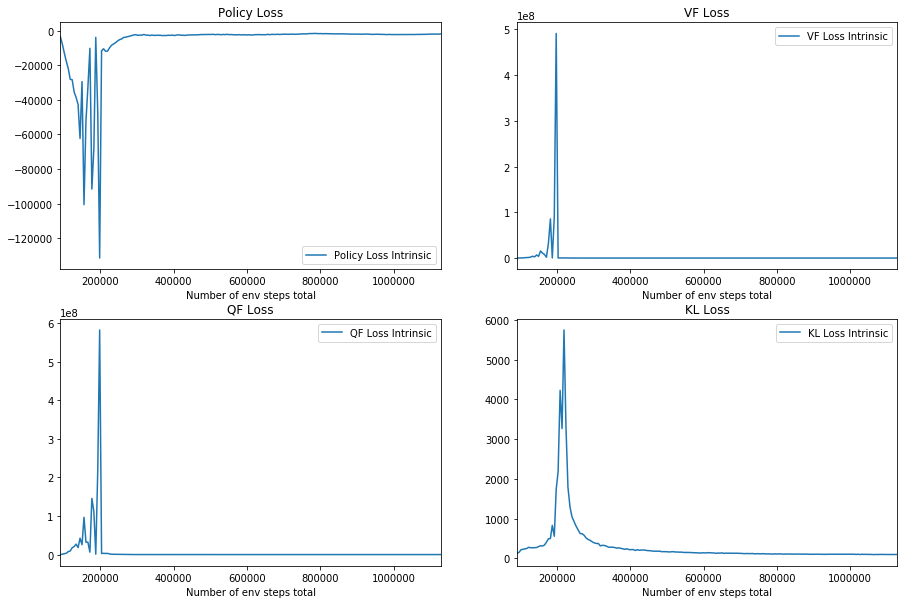

In [23]:
plott([results1, results2], ['Policy Loss', 'VF Loss', 'QF Loss', 'KL Loss'], labels)

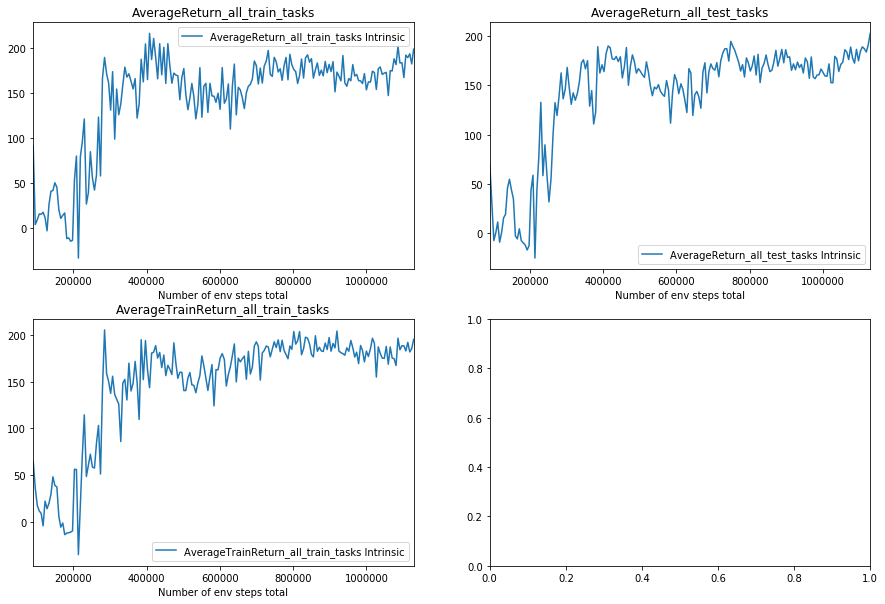

In [24]:
plott([results1, results2], ['AverageReturn_all_train_tasks', 'AverageReturn_all_test_tasks', 'AverageTrainReturn_all_train_tasks'], labels)